# Tutorial 06

## Time series preprocessing

Time series refer to data collected over time. It is a sequence of samples that were measured during some period of time, in some given intervals.

Theoretical background can be found in Lecture 9.

In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Real-world and very actual example - COVID-19

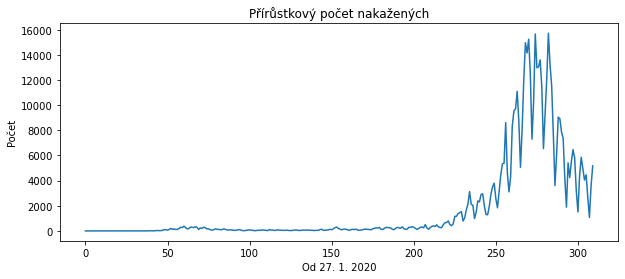

In [2]:
df = pd.read_csv('nakaza.csv')
df['prirustkovy_pocet_nakazenych'].plot(figsize=(10,4))
plt.title('Přírůstkový počet nakažených')
plt.ylabel('Počet')
plt.xlabel('Od 27. 1. 2020')
plt.show()

### Let's start with time series indexing

We shall start with a famous data set: the number of international passengers per month on Pan Am airline in the US obtained from the Federal Aviation Administration for the period 1946-1960.

In [3]:
data = pd.read_csv('AirPassengers.csv')

In [4]:
print(data.head())
print('\n')
print(data.info())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


Let's plot the data first.

<AxesSubplot:>

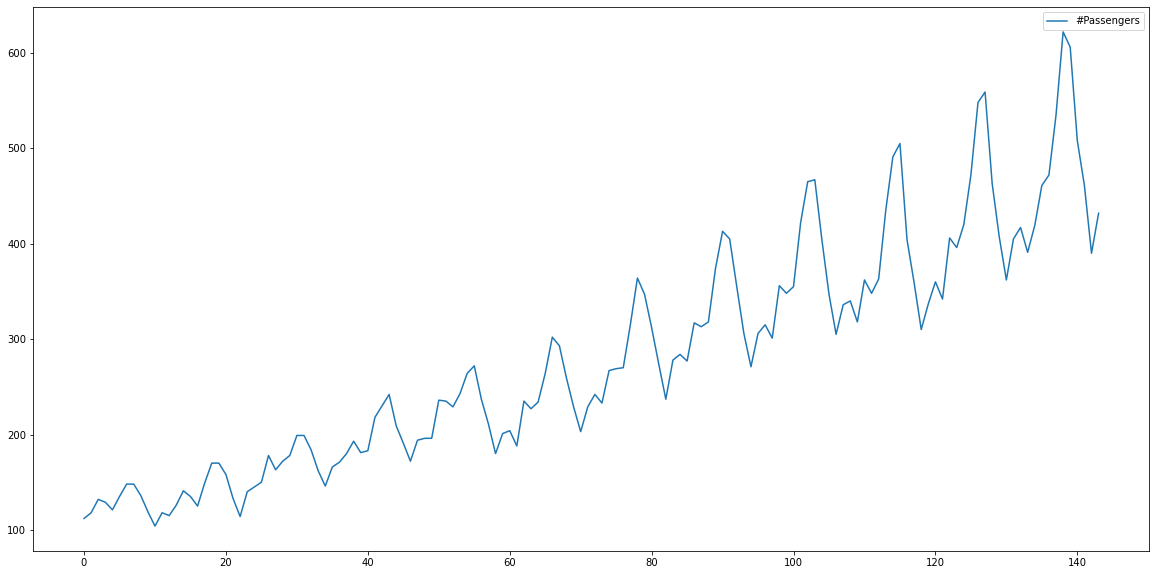

In [5]:
# first step: plot the data
data.plot() # shows something, but it is not OK: index vs. # passengers

Pandas has support for time series - see https://pandas.pydata.org/pandas-docs/stable/timeseries.html
We shall start by making the index a time data format.

In [6]:
data.index # shows default RangeIndex

RangeIndex(start=0, stop=144, step=1)

Instead of converting the index, we can specify in when reading the csv.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [7]:
from datetime import datetime
# instead numeric RangeIndex we can use objects (!)
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month') #datetime.strptime(dates,'%Y-%m')
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [8]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Followed by time series definition: Time series is a series of data points indexed (or listed or graphed) in time order.

<AxesSubplot:xlabel='Month'>

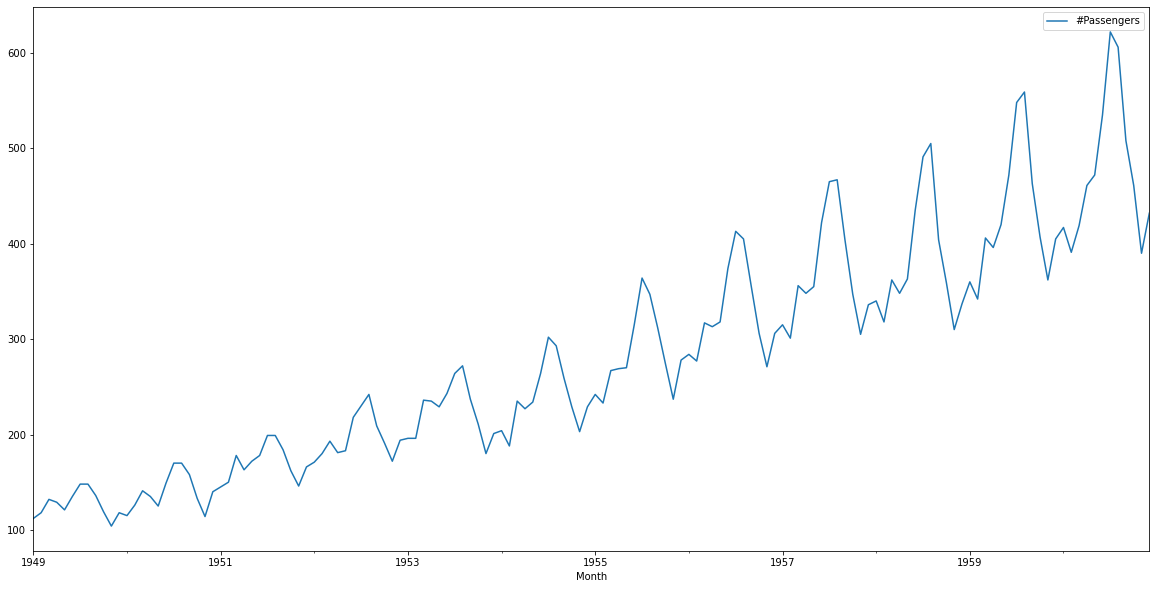

In [9]:
data.plot()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


<AxesSubplot:xlabel='Month'>

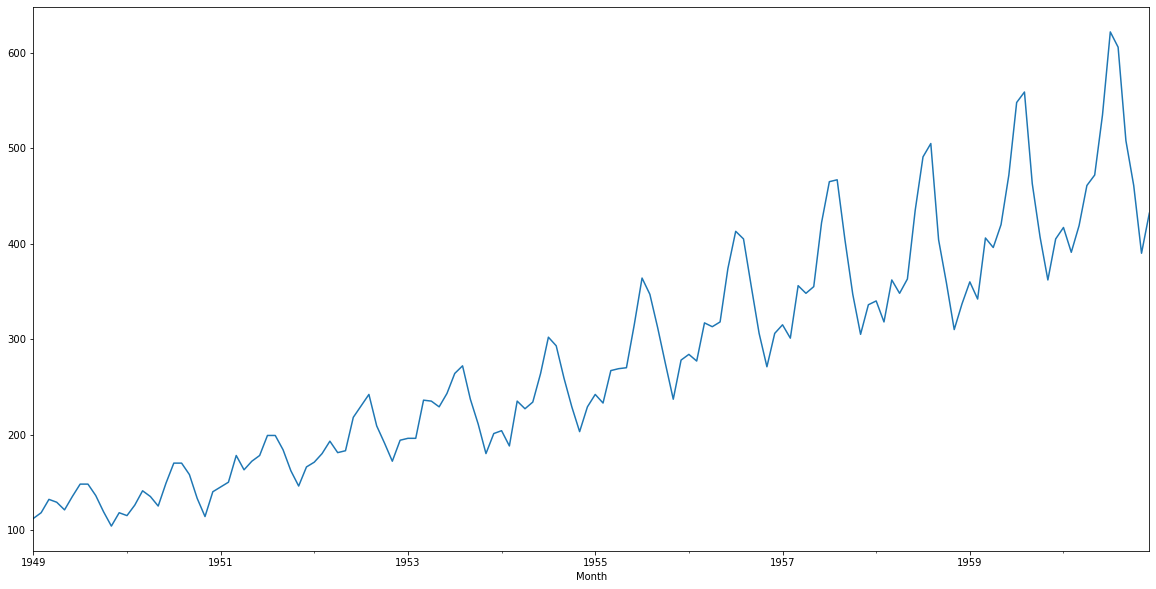

In [10]:
# let's work with series
series = data['#Passengers'] 
print(series.head())
series.plot()

In [11]:
series['1960-12-01'] # get the value using index as string

432

In [12]:
series[datetime(1960,12,1)] # proper fomat of index

432

In [13]:
# indices need to be sorted in order for the range indexing to work properly:
series['1949-01-01':'1949-05-1']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

Month
1960-12-01    432
1960-11-01    390
1960-10-01    461
1960-09-01    508
1960-08-01    606
Name: #Passengers, dtype: int64

Test range indexing:  Series([], Name: #Passengers, dtype: int64)


<AxesSubplot:xlabel='Month'>

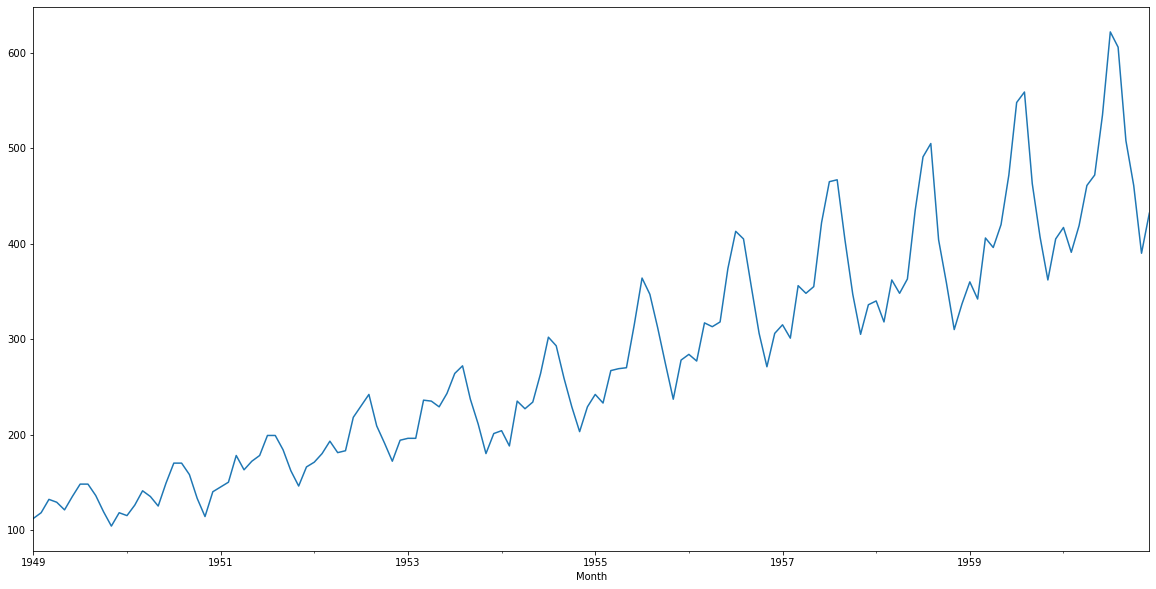

In [14]:
# try descending sort of indeces
series2 = series.sort_index(ascending=False)
print(series2.head())
print('\nTest range indexing: ', series2['1949-01-01':'1949-05-01'])
series2.plot()

## General concepts for time series preprocessing

First step is to clear the data:

* Remove noise
* Remove/correct offsets
* Remove trends
* Identify seasonality
* Normalize/standardize the data

How can it be achieved?

## Rolling window

One of the basic tools is to investigate statistic properties calculated over a (weighted) window = an interval of given length which moves over the time index of the series.

Can be used to remove noise and identify trends.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

Different window types exist, see https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions.

In [15]:
# window size = 15
q = series.rolling(15, min_periods=None, center=False, win_type='boxcar', on=None, axis=0, closed=None)

In [16]:
# rolling window.mean() = moving average (klouzavý průměr)
q.mean().head(30)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01           NaN
1950-01-01           NaN
1950-02-01           NaN
1950-03-01    126.800000
1950-04-01    128.333333
1950-05-01    128.800000
1950-06-01    129.933333
1950-07-01    132.666667
1950-08-01    135.933333
1950-09-01    137.466667
1950-10-01    136.466667
1950-11-01    134.200000
1950-12-01    134.466667
1951-01-01    136.200000
1951-02-01    139.266667
1951-03-01    143.266667
1951-04-01    146.466667
1951-05-01    149.533333
1951-06-01    152.000000
Name: #Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

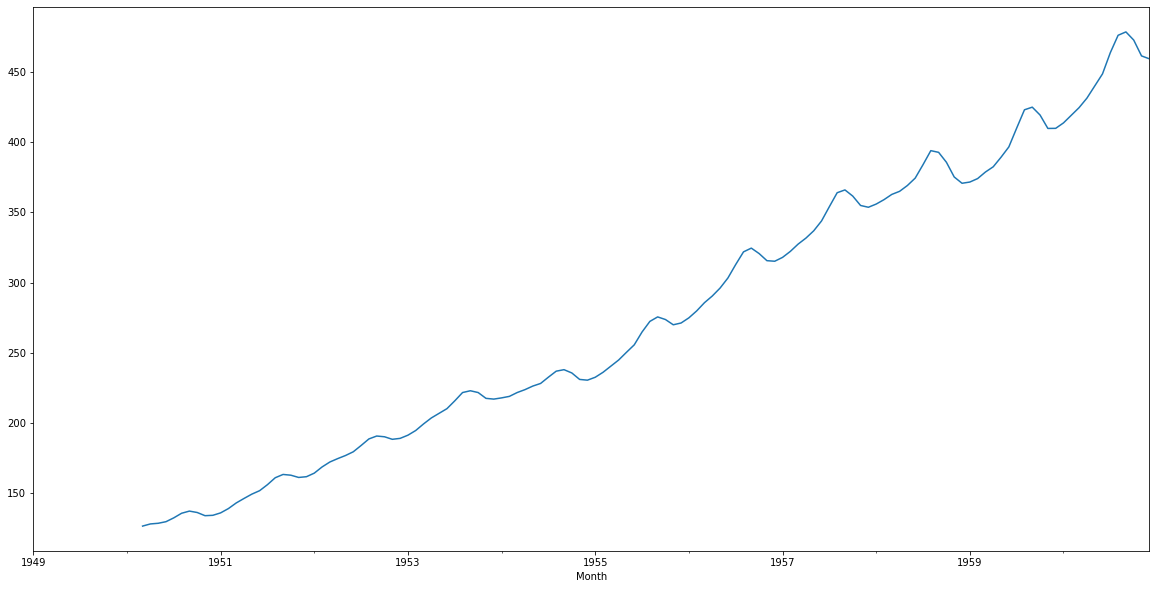

In [17]:
q.mean().plot() 

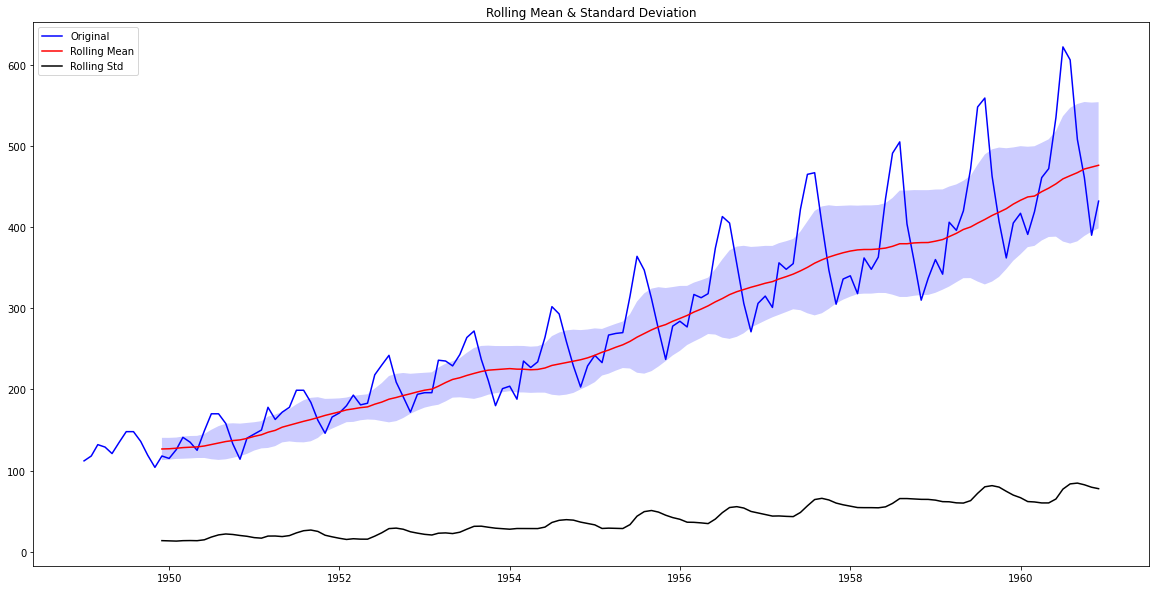

In [18]:
N = 12
q = series.rolling(N)
rolmean = q.mean()
rolstd = q.std()

orig = plt.plot(series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.fill_between(rolmean.index, rolmean-rolstd, rolmean+rolstd, facecolor='blue', alpha=.2) 
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

This time series does not contain any noise - we have integer data assumed to be correct.
There is an obvious increasing trend.
We shall try **removing the trend**.

Do you have any idea how to remove trend?

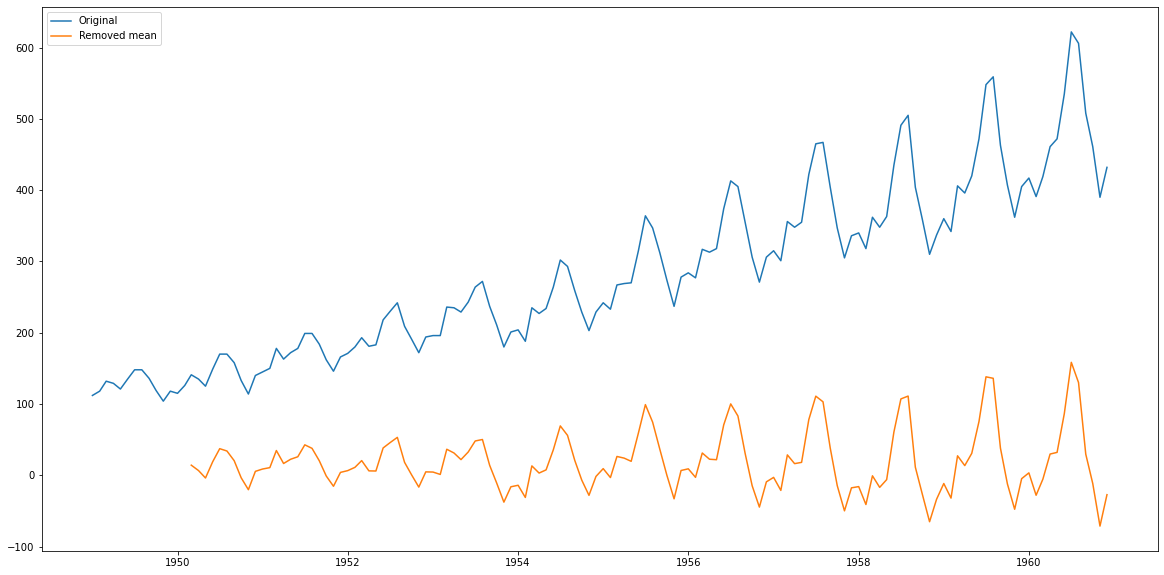

In [19]:
# the simplest method - remove moving average/rolling window
q = series.rolling(15, min_periods=None, center=False, win_type='boxcar', on=None, axis=0, closed=None)

# plot data with a linear trend
plt.plot(series,label='Original')
# remove mean
plt.plot(series-q.mean(), label='Removed mean')
plt.legend(loc='best')
plt.show()

### Detrend by Differencing

We shall deal with the trend using another (very simple) method (however, the data are transformed substantially).

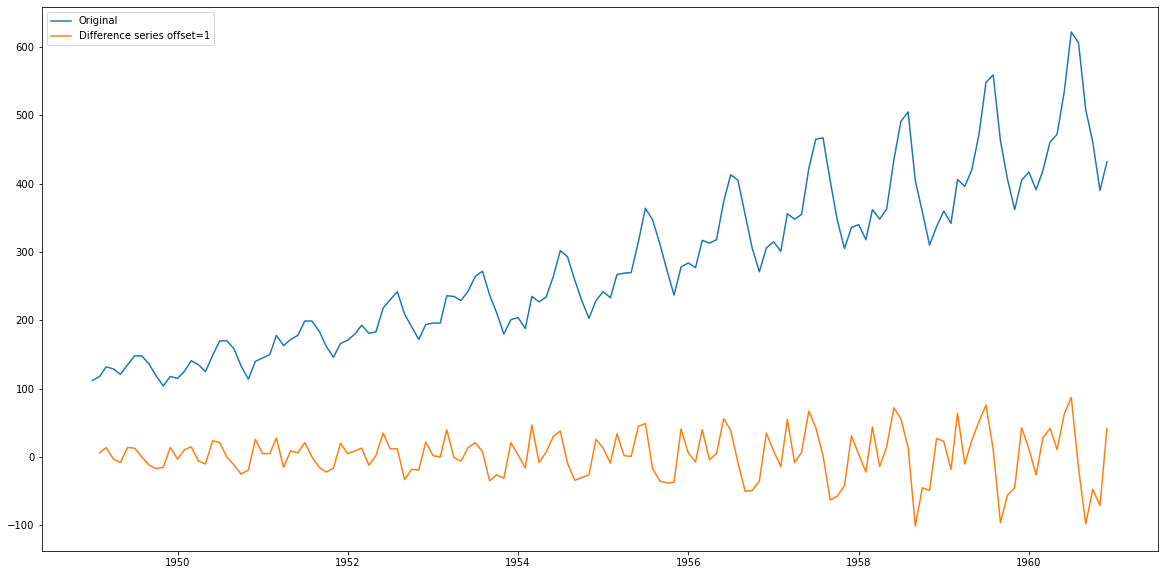

In [20]:
# create a differenced series
def difference(dataset, offset=1):
    diff = list()
    for i in range(offset, len(dataset)):
        value = dataset[i] - dataset[i - offset]
        diff.append(value)
    return diff
 
# define a dataset with a linear trend
plt.plot(series,label='Original')
# difference the dataset
offset = 1
diff = difference(data.values, offset)
plt.plot(series.index[offset:],diff,label='Difference series offset='+str(offset))
plt.legend(loc='best')
plt.show()

Differences can also be done using pandas `shift`.
The method can also work with a time index.

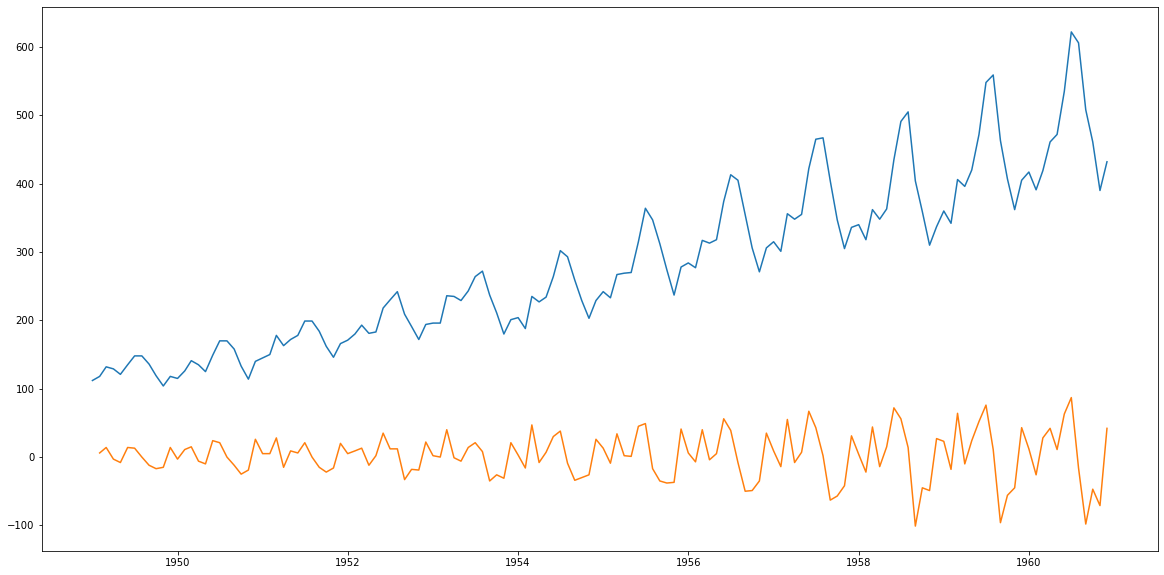

In [21]:
# we store the series without trend - používáme ji dál
series_without_trend = (series-series.shift(1,freq='MS')).dropna() 

plt.plot(series,label='Original')
plt.plot(series_without_trend)

### Detrend by Model Fitting

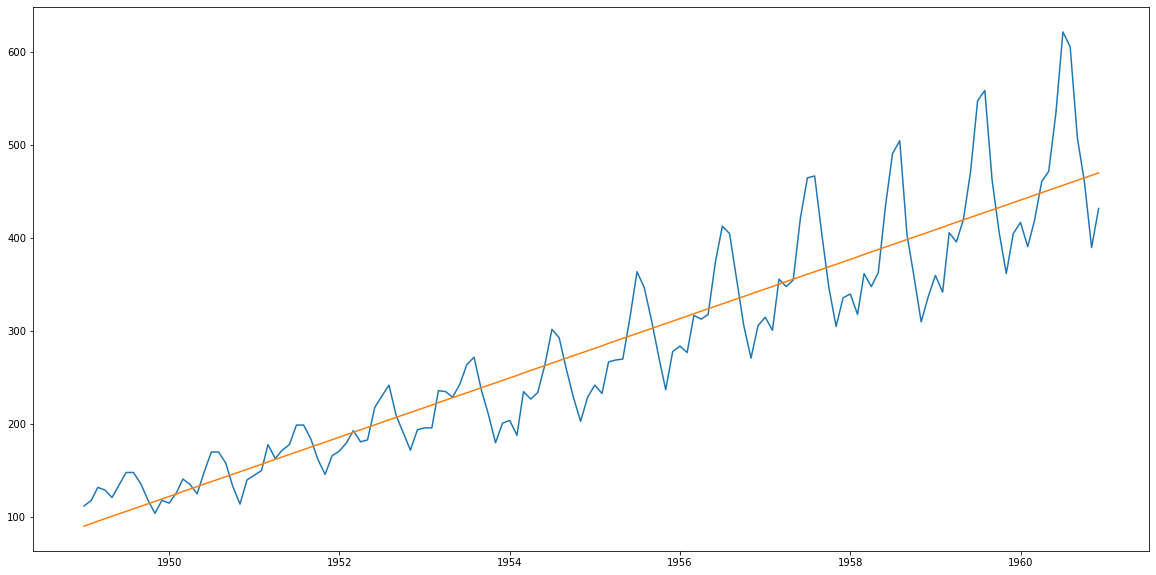

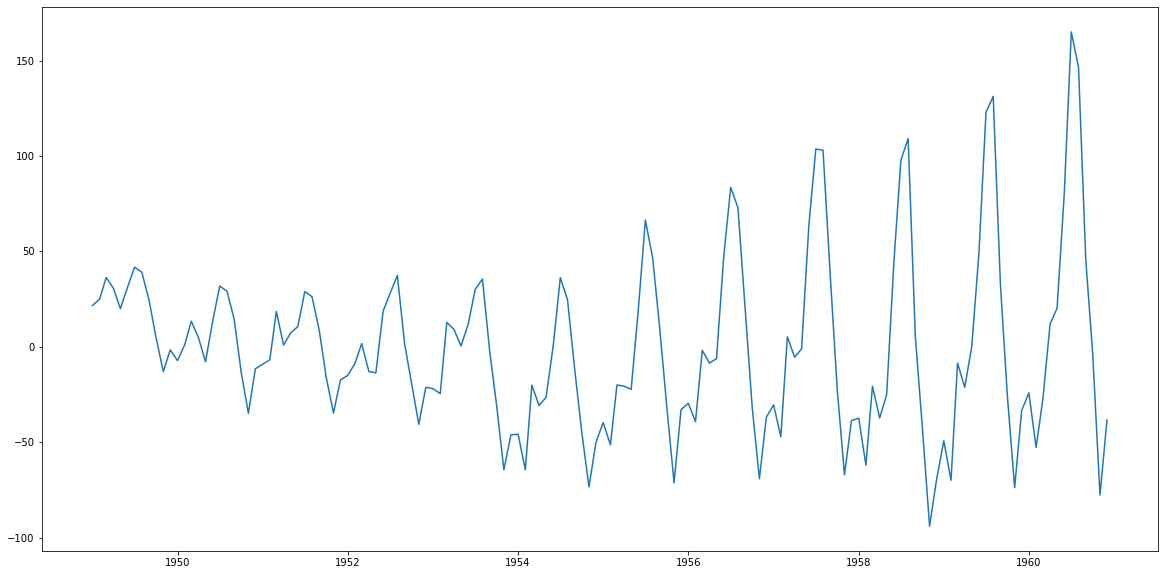

In [22]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(series.index,y)
plt.plot(series.index,trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
plt.plot(series.index,detrended)
plt.show()

### Standardization

Standardization refers (again) to the procedure of shifting and rescaling the series such that it has zero mean and variance $1$.

It makes little sense to normalize a series that contains a trend.

Mean: 280.298611, StandardDeviation: 119.549042
Mean: 2.237762, StandardDeviation: 33.636053


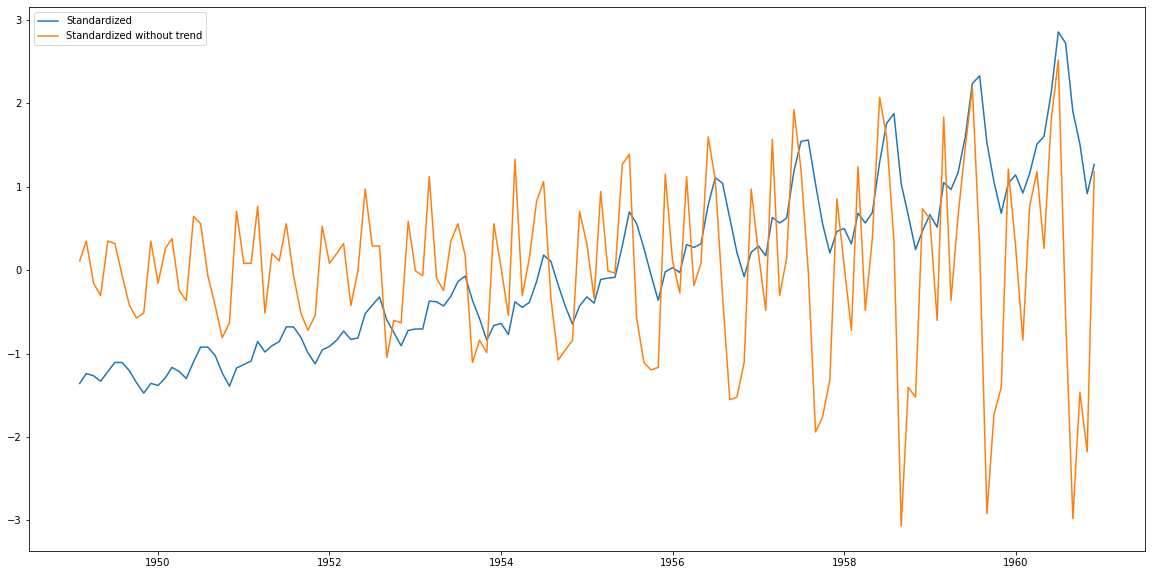

In [23]:
from sklearn.preprocessing import StandardScaler

values = series.values
values = values.reshape((len(values), 1))

# train the standardization, including trend
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
# standardization the dataset
normalized = scaler.transform(values)

# train the standardization, without trend
values = series_without_trend.values
values = values.reshape((len(values), 1))
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
normalized_series_without_trend = scaler.transform(values)

#plt.plot(series, color='blue',label='Original')
plt.plot(series.index[offset:],normalized[offset:],label='Standardized')
plt.plot(series.index[offset:],normalized_series_without_trend,label='Standardized without trend')
plt.legend(loc='best')

### Noise reduction

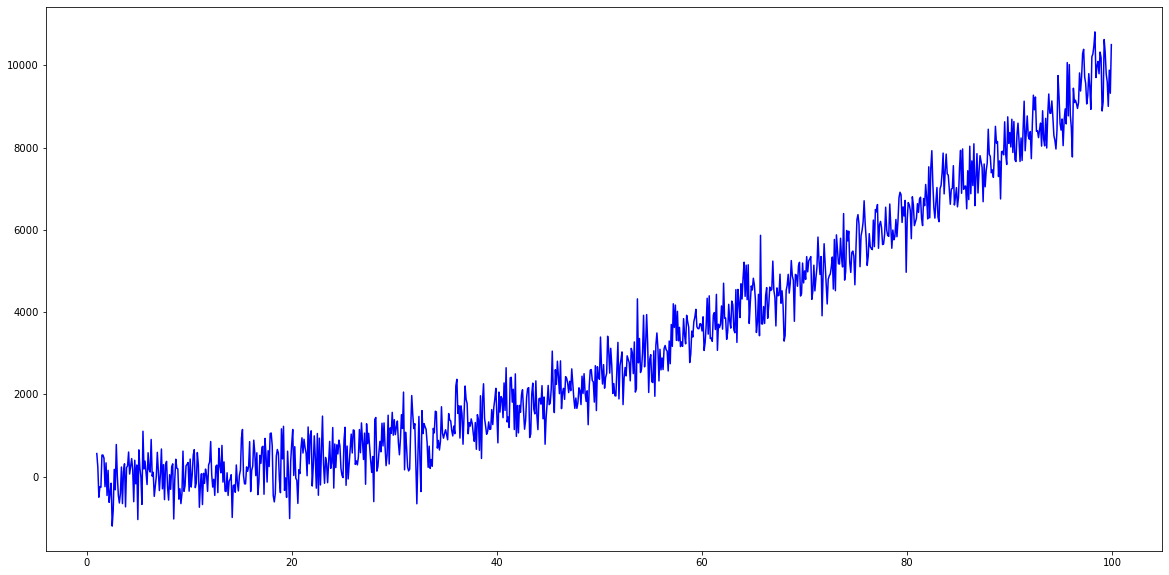

In [24]:
# Generate some data with noise

mu, sigma = 0, 500

x = np.arange(1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data, trend
plt.plot(x, y, linestyle="-", c="b")  # it includes some noise

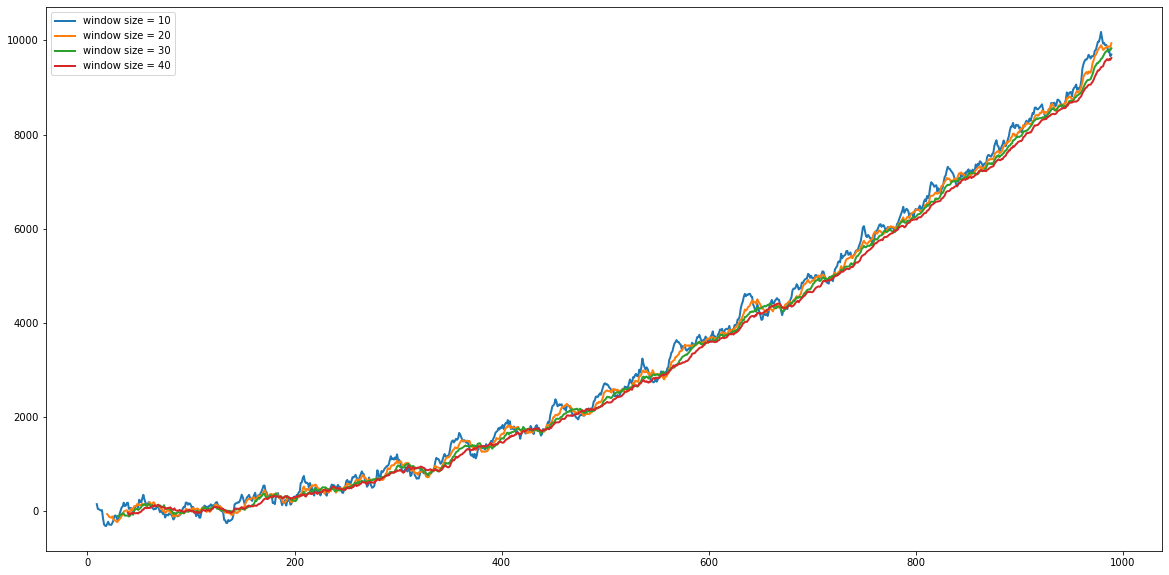

In [25]:
Y = pd.Series(y)
for window_size in [10,20,30,40]:
    plt.plot(Y.rolling(window_size).mean(),linewidth=2,label='window size = %s' % window_size)
plt.legend()

### Seasonal decomposition

[Seasonality](https://en.wikipedia.org/wiki/Seasonality) is another time series property (as trend).
For example: progress of temperature during the year, occupancy of ski centers and so on.


Time series can be decomposed using one of the two common models:

* _additive_: Trend + Seasonality + Noise
* _multiplicative_: Trend \* Seasonality \* Noise

By that we are able to get seasonality.

We shall only quickly test a naive implementation of seasonal decomposition http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

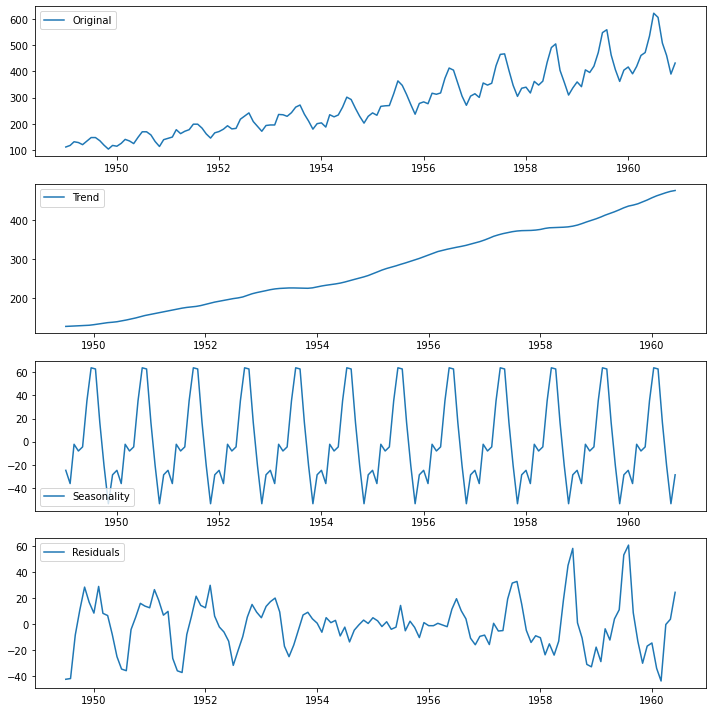

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series, model='additive') 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

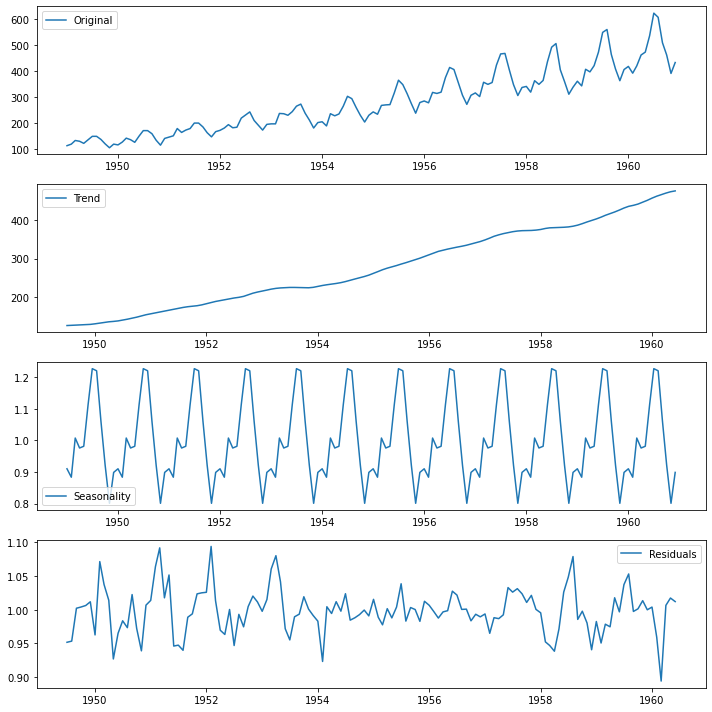

In [27]:
decomposition = seasonal_decompose(series, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

More advanced techniques are available, the starting points are the keywords [Digital signal processing](https://en.wikipedia.org/wiki/Digital_signal_processing) and [Digital filter](https://en.wikipedia.org/wiki/Digital_filter).

## Time series similarity

For the two basic tasks of machine learning, prediction and classification, we have (very quickly) covered the preprocessing for prediction. For the classification task, we need to be able to tell how much are two time series similar one to another.

We start by generating a simple artificial example ([source](https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb)).

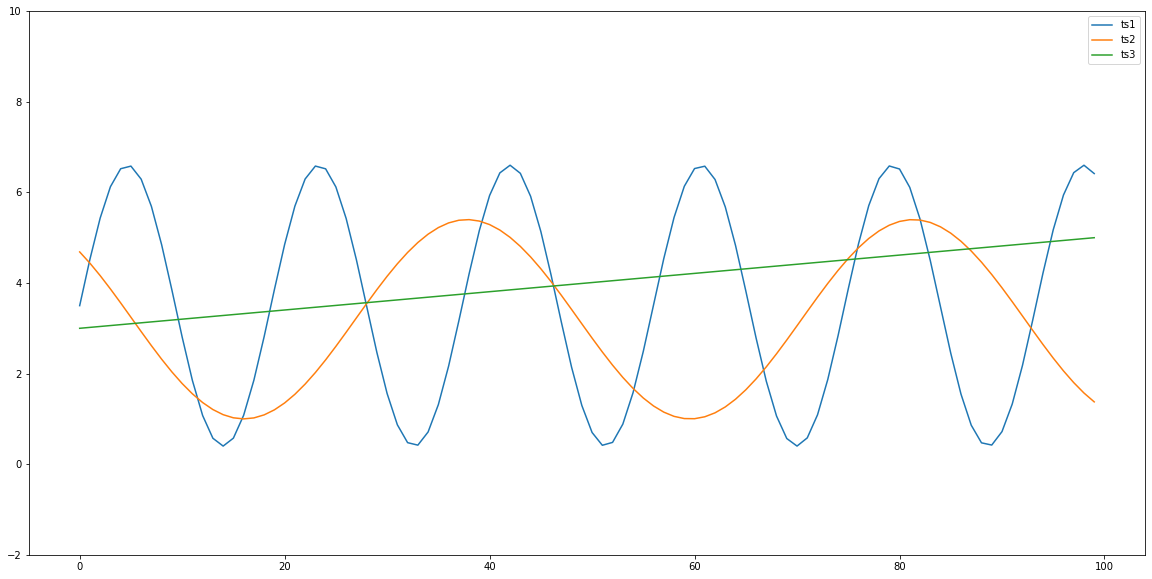

In [28]:
x = np.linspace(0,50,100)
ts1 = pd.Series(3.1*np.sin(x/1.5)+3.5)
#ts2 = pd.Series(3.1*np.sin(x/1.5+1.5)+4)
ts2 = pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3 = pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

Is `ts1` more similar to `ts2` or to `ts3`?

In [29]:
# smaller = better
print('ts1 vs. t2: ', np.linalg.norm(ts1-ts2)) # Euclidean (L2) norm
print('ts1 vs. t3: ', np.linalg.norm(ts1-ts3))

ts1 vs. t2:  26.959216037969345
ts1 vs. t3:  23.189249190311056


Well, one can see that `ts1` is more similar to `ts2` because they are both sin functions. If we use the Euclidean norm, the answer is in contradiction with our intuition.

In general, Euclidean norm is not very useful and makes little sense, although it may be enough sometimes:

N=1 norm=39.715892
N=2 norm=49.788987
N=3 norm=52.921573
N=4 norm=53.716348
N=5 norm=49.184877
N=6 norm=48.441778
N=7 norm=48.680531
N=8 norm=53.577013
N=9 norm=51.269700
N=10 norm=49.292971
N=11 norm=38.605326
N=12 norm=12.310859
N=13 norm=38.666225
N=14 norm=49.668826
N=15 norm=52.473207
N=16 norm=52.160715
N=17 norm=48.005043
N=18 norm=47.819327
N=19 norm=48.459328
N=20 norm=53.904462
N=21 norm=50.653678
N=22 norm=48.358168
N=23 norm=37.909322
N=24 norm=15.294861
N=25 norm=38.057494
N=26 norm=49.142302
N=27 norm=51.836198
N=28 norm=50.548384
N=29 norm=47.738230


<AxesSubplot:>

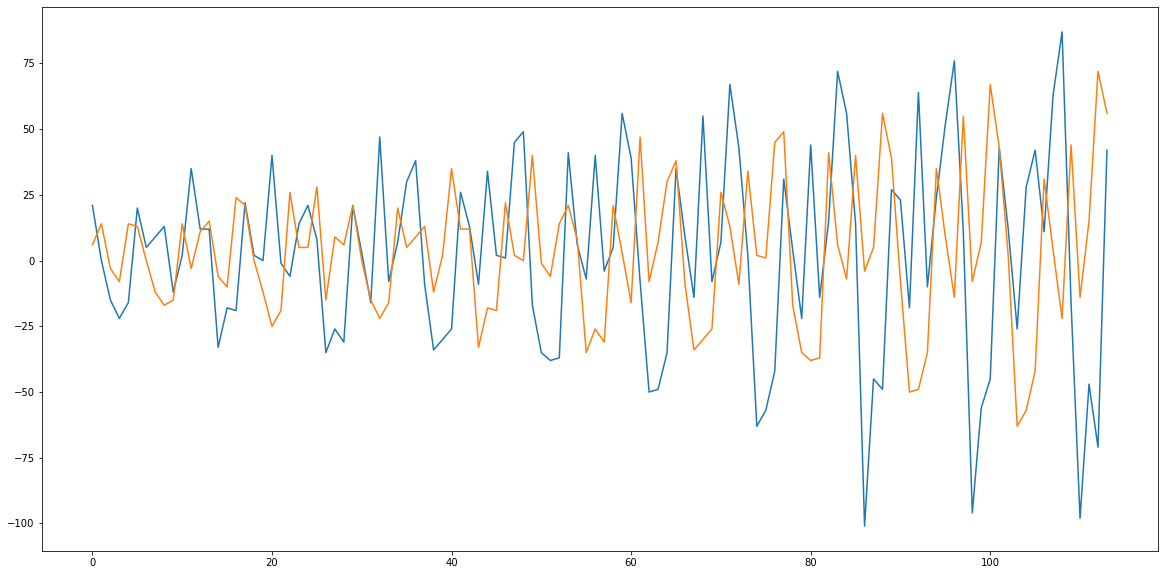

In [30]:
# passengers example
offset = 1
diff = series-series.shift(offset,freq='MS') # detrend the series
diff = diff.dropna()
total = diff.shape[0]

for N in range(1,30):
    diff1 = np.array(diff[N:].values)
    diff2 = np.array(diff[:-N].values)
    print('N=%d norm=%f' % (N,np.linalg.norm(diff1-diff2)/(np.sqrt(total-N)))) 
    #the denominator is a normalizing term - the compared vectors have distinct dimension

diff1 = pd.Series(diff1)
diff1.plot()
diff2 = pd.Series(diff2)
diff2.plot()

We detect a periodic behaviour in the seasonality of `series`, and the period is 12 months!

### A short detour - Discrete Fourier Transform & friends

The [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform), and similar transform, are an important tool in digital signal processing.

In short, they transform the series, seen as a vector, to another basis, that is, they return the coordinates of the series vector in a suitable (orthonormal) basis. We are using [Fast Fourier Transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) algorithm in NumPy.

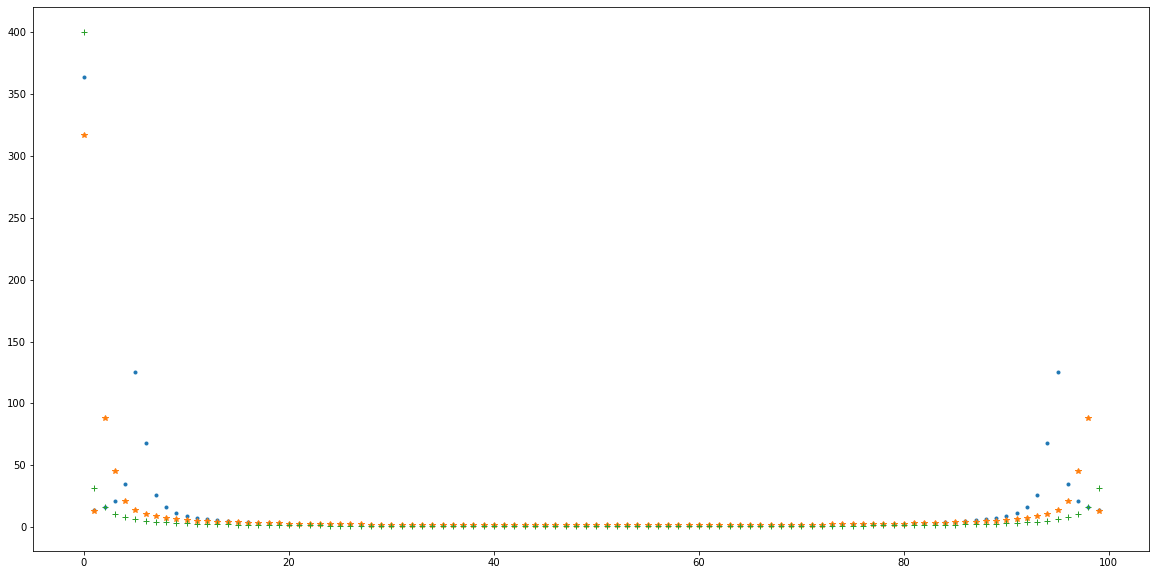

In [31]:
fft_ts1 = np.fft.fft(ts1)
fft_ts2 = np.fft.fft(ts2)
fft_ts3 = np.fft.fft(ts3)

plt.plot(np.abs(fft_ts1), '.')
plt.plot(np.abs(fft_ts2), '*')
plt.plot(np.abs(fft_ts3), '+')

Using Euclidean distance will yield the same result (this is Parseval's theorem).

(There is a factor since the default implementaion is not normalizing the results of DFT/FFT.)

In [32]:
print('ts1 vs. t2: ', np.linalg.norm((fft_ts1-fft_ts2)))
print('ts1 vs. t3: ', np.linalg.norm((fft_ts1-fft_ts3)))

ts1 vs. t2:  269.59216037969344
ts1 vs. t3:  231.89249190311054


However, DFT might be used to reduce the dimension of the vectors; only the first few coefficients are taken into account as they usually are the most important for the signal.

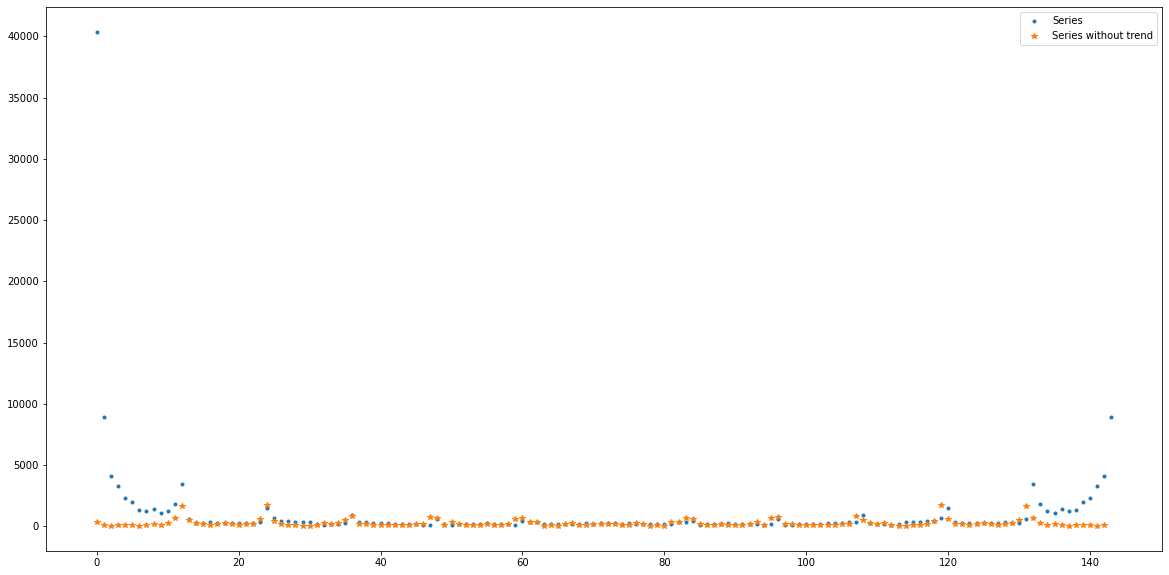

In [33]:
plt.plot(np.abs(np.fft.fft(np.array(series.values))),'.',label='Series')
plt.plot(np.abs(np.fft.fft(np.array(series_without_trend))),'*',label='Series without trend')
plt.legend()

### Dynamic Time Warping

Dynamic time warping finds the optimal non-linear alignment between two time series. The aligment on the time axis fixes the distortions that cannot be captured when comparing coefficients having the same index (as many metrics do). Dynamic time warping is _quadratic_ in the length of the time series used.

Dynamic time warping works in the following way. Consider two time series $Q$ and $C$ of the same length $n$ where $$Q=q_1,q_2,...,q_n$$ and $$C=c_1,c_2,...,c_n.$$
We construct an $n\times n$ matrix $M$ whose $i,j^{th}$ element is the (Euclidean) distance between $q_i$ and $c_j$.
We want to find a path through this matrix that minimizes the cumulative distance.
This path then determines the optimal alignment between the two time series.
Of course, we restrict ourselves to path that have non-decreasing indices and have fixed starting end ending points.

The optimal path is usually found via dynamic programming, specifically the following recursive function:$$\gamma(i,j)=\mathrm{d}(q_i,c_j)+\min ( \gamma(i-1,j-1),\gamma(i-1,j),\gamma(i,j-1)),$$ 
where $\mathrm{d}$ is some distance.

<img src="eucl_vs_dtw.png">

A comparison of Euclidean norm and Dynamic Time Warping.

Source: https://towardsdatascience.com/an-illustrative-introduction-to-dynamic-time-warping-36aa98513b98 

In [34]:
# taken from https://github.com/alexminnaar/time-series-classification-and-clustering
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [35]:
print('ts1 vs. t2: ', DTWDistance(ts1,ts2)) # krásně poznalo posunutý sínus
print('ts1 vs. t3: ', DTWDistance(ts1,ts3))

ts1 vs. t2:  17.929718468641138
ts1 vs. t3:  21.549494824404572


We can improve the DTW distance by adding another restriction for the path: we require the path to be close the diagonal of $M$. The closeness is given by the width `w` of the stripe along the diagonal that is to contain the optimal path. In other words, we give a limit on the maximal possible time distortion that DTW can capture.

In [36]:
# Speeding Up Dynamic Time Warping
def DTWDistance(s1, s2, w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [37]:
print('ts1 vs. t2: ', DTWDistance(ts1,ts2,10))
print('ts1 vs. t3: ', DTWDistance(ts1,ts3,10))

ts1 vs. t2:  18.59655183841726
ts1 vs. t3:  22.47248284679103


In [38]:
for N in range(1,15):
    diff1 = np.array(series_without_trend[N:].values)
    diff2 = np.array(series_without_trend[:-N].values)
    print('N=%d DTW=%f' % (N,DTWDistance(diff1,diff2,10)))

N=1 DTW=113.282832
N=2 DTW=94.164749
N=3 DTW=153.508957
N=4 DTW=120.735248
N=5 DTW=147.827602
N=6 DTW=141.456707
N=7 DTW=144.034718
N=8 DTW=141.820309
N=9 DTW=139.942845
N=10 DTW=148.330712
N=11 DTW=131.582674
N=12 DTW=127.863208
N=13 DTW=153.368836
N=14 DTW=161.304061


#### Envelope

Another similarity measure requires to build an **envelope** around the base series and then test whether the tested signal falls well into this envelope.

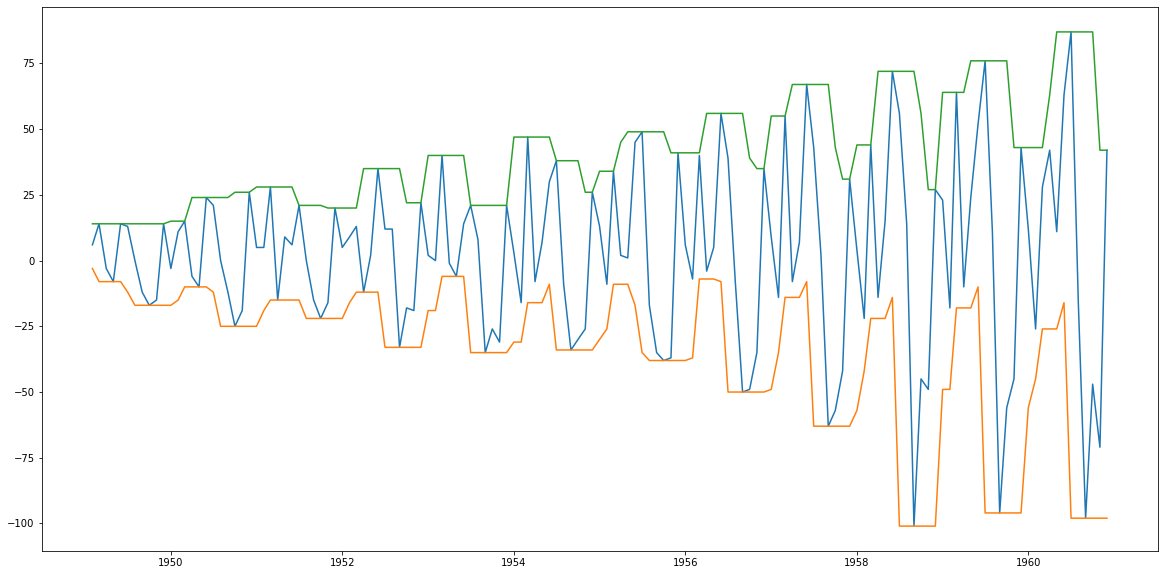

In [39]:
r = 3
# lower bound for the envelope
L = [min(series_without_trend[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(series_without_trend))]
# upper bound for the envelope
U = [max(series_without_trend[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(series_without_trend))] 

plt.plot(series_without_trend)
plt.plot(series_without_trend.index,L)
plt.plot(series_without_trend.index,U)

We load a more suitable data to test this approach.

In [40]:
# last column contains the class
train = np.genfromtxt('train.csv', delimiter='\t')
test = np.genfromtxt('test.csv', delimiter='\t')

train

array([[-0.37693558,  1.2248643 ,  0.34387438, ..., -1.3117417 ,
        -1.1971462 ,  1.        ],
       [ 0.64440621,  0.41326914, -0.86227849, ...,  0.08574208,
         0.02499741,  1.        ],
       [-0.97866735, -0.40623244,  0.82242857, ...,  0.10699555,
         0.08271546,  1.        ],
       ...,
       [ 0.96590061,  0.64016083,  0.48085702, ..., -1.195676  ,
        -0.80364439,  6.        ],
       [ 0.35497067,  0.10965181,  0.23889694, ..., -1.7653707 ,
        -1.6753831 ,  6.        ],
       [ 0.64661651,  0.61351555,  1.1266638 , ..., -0.83334659,
        -0.26117832,  6.        ]])

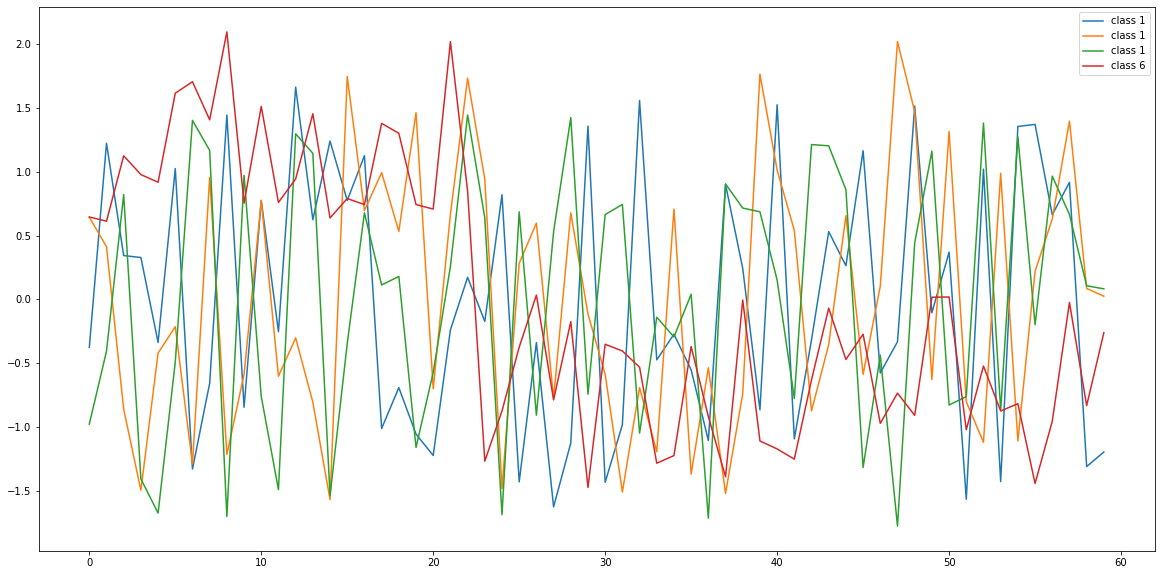

In [41]:
# example of few data
plt.plot(train[0,:-1],label='class %d' % train[0,-1])
plt.plot(train[1,:-1],label='class %d' % train[1,-1])
plt.plot(train[2,:-1],label='class %d' % train[2,-1])

plt.plot(train[-1,:-1],label='class %d' % train[-1,-1])

plt.legend()

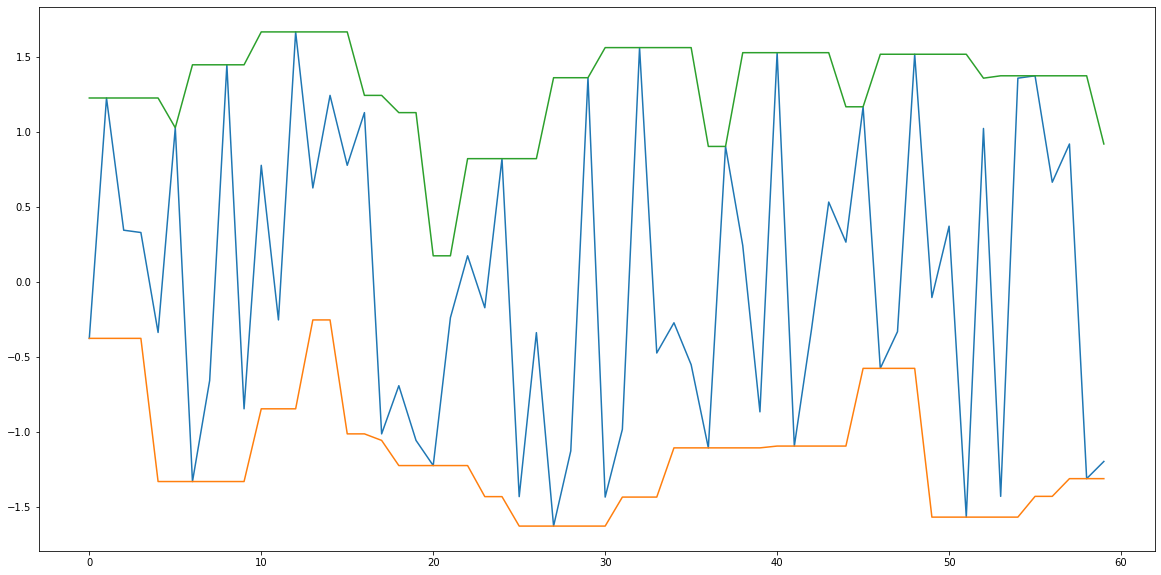

In [42]:
# let's create an envelope for the first series
ts = train[0,:-1]
r = 3
L = [min(ts[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(ts))]
U = [max(ts[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(ts))]

plt.plot(ts)
plt.plot(L)
plt.plot(U)

The distance from the envelope is given by the following the _LB Keogh_ lower bound of dynamic time warping.
It is defined as $$LBKeogh(Q,C)=\sum_{i=1}^n (c_i-U_i)^2I(c_i > U_i)+(c_i-L_i)^2I(c_i < L_i)$$
where $U_i$ and $L_i$ are upper and lower bounds for time series $Q$ which are defined as $U_i=max(q_{i-r}:q_{i+r})$ and $L_i=min(q_{i-r}:q_{i+r})$ for a reach $r$ and $I(\cdot)$ is the indicator function.

Its name comes from the fact that it was originally conceived as a cheaper indicator for the DTW metric, having this property:
$$LB Keogh(Q,C) \leq DTW(Q,C)$$

It was introduced in 2002 by this [paper](https://www.cs.ucr.edu/~eamonn/vldb2002.pdf) as the first non trivial lower bound for DTW.

In [43]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [44]:
print(LB_Keogh(train[0,:-1],ts,5)) # compare to the first series
print(LB_Keogh(train[1,:-1],ts,5))
print(LB_Keogh(train[2,:-1],ts,5))
print(LB_Keogh(train[-1,:-1],ts,5))

0.0
1.3163875046068647
1.3391804641274128
1.0944124674000166


In [45]:
print(DTWDistance(train[0,:-1],ts,5))
print(DTWDistance(train[1,:-1],ts,5))
print(DTWDistance(train[2,:-1],ts,5))
print(DTWDistance(train[-1,:-1],ts,5))

0.0
5.009907372383207
5.204767709613196
6.891864794154797


### Hierarchical Clustering on Time Series

When we know the distance between series, we are able to use some classification or clustering methods based on some metric.

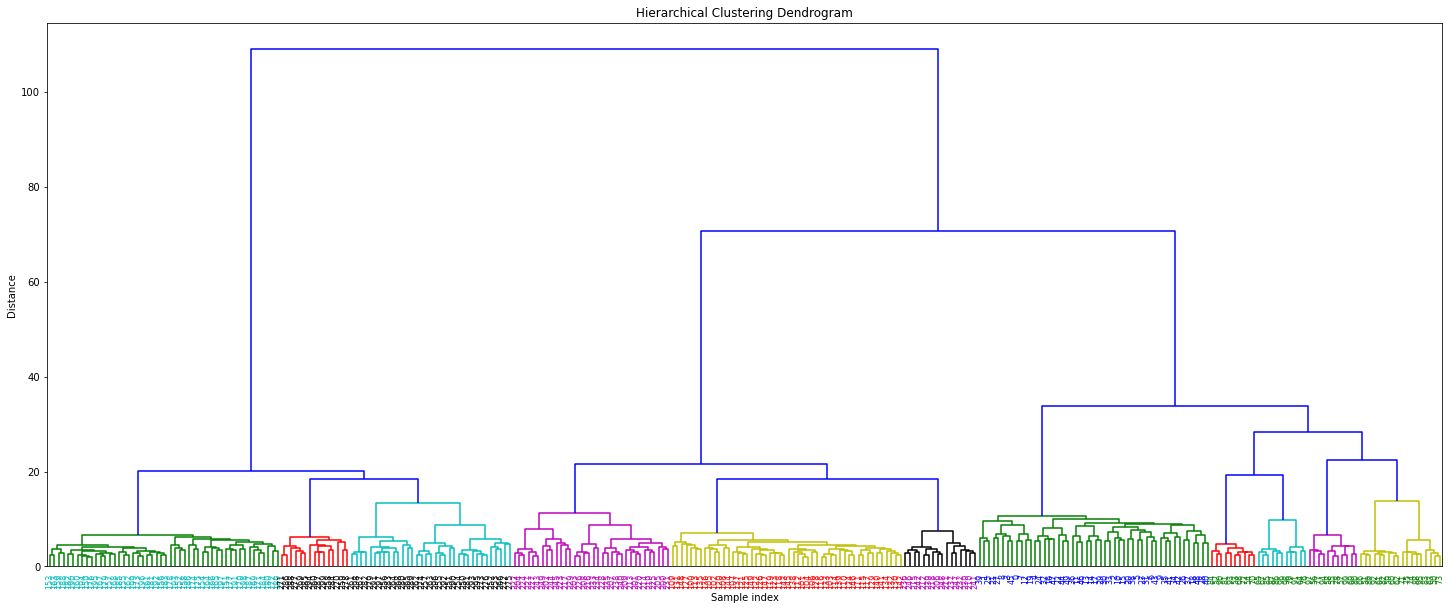

In [46]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
from scipy.spatial.distance import pdist 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
from scipy.cluster.hierarchy import linkage
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster.hierarchy import dendrogram 

w = 2 # Speeding Up Dynamic Time Warping, w je ta šířka, pokud 1 = L2 norma
dtwdist = lambda u, v: DTWDistance(u, v, w)
DTW = pdist(train, dtwdist) # compute distance between observations in our train data using DTWDistance as metric

Z = linkage(DTW, 'ward') # perform clustering on DTW data using Ward variance minimization algorithm

colors = ['b', 'g', 'r', 'c', 'm', 'k']
c = {i: colors[int(val)-1] for i, val in enumerate(train[:,-1])}

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=15, # where to start to put distinct colors
)
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(c[int(lbl.get_text())])

plt.show()

Note: If you are interested in time series, enroll in the [NI-SCR](https://courses.fit.cvut.cz/MI-SCR/) course. You will get knowledge about more advanced and powerful methods.

# Finish the task -> 2 bonus points

1. Perform some experiments to obtain an idea on the performance of `DTWDistance` and `LB_Keogh` similarity measures on `test` and `train` data using the provided class information (in the last column). In other words, try to aswer the question if one of the distances could be used for sucessful clustering of `train` and/or for classification of `test`? -> 1 point
1. For each class of `train`, construct its wedge (from the lecture) and use it as the envelope bounds $U$ and $L$ for a redefined `LB_Keogh` distance. Use this distance on the `test` and try to classify its elements and report on the performance of the classification (sucess percentage and confusion matrix). -> 1 point

You are allowed to modify and experiment with the two measures!

**To submit your solution**, follow the same instructions as for homeworks from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html with one difference - create folder named _bonus_.

**Deadline** is the same as for homework 03: **26. 12. 2020 23:59**.    